# 两个特征

In [217]:
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt

#数字与相应的花的种类对应
def iris_type(s):
    it = {b'Iris-setosa':  0,    b'Iris-versicolor': 1,   b'Iris-virginica': 2}
    return it[s]

# 花有四个特征：花萼长度、花萼宽度，花瓣长度，花瓣宽度
iris_feature = 'sepal length', 'sepal width', 'petal length', 'petalwidth'
# 数据文件路径
path = u'iris.data' 
#numpy.loadtxt(fname（文件名）, dtype=（类型）, comments='#', delimiter（定界符）=None, converters（转换器）=None, skiprows=0, usecols=None, unpack=False, ndmin=0)
# 路径，浮点型数据，遇到逗号就分隔，第4列使用函数iris_type函数将名称（字符串）转化为数字（0 1 2）
data = np.loadtxt(path, dtype=float, delimiter=',', converters={4:iris_type})


In [218]:
# 将数据的0 到3 列组成x，第4 列得到y
#x为数据集，y为结果
x, y = np.split(data, (4,), axis=1)
x[:5],y[np.random.randint(5,150,5)]

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2]]),
 array([[0.],
        [1.],
        [1.],
        [1.],
        [0.]]))

## 树模型参数:

class sklearn.tree.DecisionTreeRegressor(*, criterion='mse', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, presort='deprecated', ccp_alpha=0.0)

-  1.criterion  gini  or  entropy 衡量标准—————选择熵值还是gini系数作为衡量标准

-  2.splitter  best or random 切分点的选择 ———— 前者是在所有特征中找最好的切分点 后者是在部分特征中（数据量大的时候）默认参数是best

-  3.max_depth  最大深度 ———— 数据少或者特征少的时候可以不管这个值，如果模型样本量多，特征也多的情况下，可以for循环尝试限制下

-  4.min_samples_split 最小样本数 ————  如果某节点的样本数少于min_samples_split，则不会继续再尝试选择最优特征来进行划分如果样本量不大，不需要管这个值。如果样本量数量级非常大，则推荐增大这个值。

-  5.min_samples_leaf  最小叶子节点 ————   这个值限制了叶子节点最少的样本数，如果某叶子节点数目小于样本数，则会和兄弟节点一起被剪枝，如果样本量不大，不需要管这个值，大些如10W可是尝试下5

- 6.min_weight_fraction_leaf 最小权重值————这个值限制了叶子节点所有样本权重和的最小值，如果小于这个值，则会和兄弟节点一起被剪枝默认是0，就是不考虑权重问题。一般来说，如果我们有较多样本有缺失值，或者分类树样本的分布类别偏差很大，就会引入样本权重，这时我们就要注意这个值了。

-  7.max_leaf_nodes 最大叶子节点数————通过限制最大叶子节点数，可以防止过拟合，默认是"None”，即不限制最大的叶子节点数。如果加了限制，算法会建立在最大叶子节点数内最优的决策树。如果特征不多，可以不考虑这个值，但是如果特征分成多的话，可以加以限制具体的值可以通过交叉验证得到。

-  8.class_weight 指定样本各类别的的权重————主要是为了防止训练集某些类别的样本过多导致训练的决策树过于偏向这些类别。这里可以自己指定各个样本的权重如果使用“balanced”，则算法会自己计算权重，样本量少的类别所对应的样本权重会高。
- n_estimators:要建立树的个数

In [219]:
# 为了可视化，仅使用前两列特征，一共有四个特征
x = x[:, :2]
# 决策树参数估计
# min_samples_split = 10：如果该结点包含的样本数目大于10，则(有可能)对其分支
# min_samples_leaf = 10：若将某结点分支后，得到的每个子结点样本数目都大于10，则完成分支；否则，不进行分支
clf = tree.DecisionTreeClassifier(criterion='entropy',min_samples_leaf=8)
dt_clf = clf.fit(x, y)

[Text(534.75, 1245.75, 'X[0] <= 5.55\nentropy = 1.585\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(186.0, 1019.25, 'X[1] <= 2.8\nentropy = 0.813\nsamples = 59\nvalue = [47, 11, 1]'),
 Text(93.0, 792.75, 'entropy = 0.817\nsamples = 12\nvalue = [1, 10, 1]'),
 Text(279.0, 792.75, 'X[1] <= 3.05\nentropy = 0.149\nsamples = 47\nvalue = [46, 1, 0]'),
 Text(186.0, 566.25, 'entropy = 0.544\nsamples = 8\nvalue = [7, 1, 0]'),
 Text(372.0, 566.25, 'entropy = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(883.5, 1019.25, 'X[0] <= 6.15\nentropy = 1.167\nsamples = 91\nvalue = [3, 39, 49]'),
 Text(651.0, 792.75, 'X[1] <= 2.95\nentropy = 1.225\nsamples = 36\nvalue = [3, 23, 10]'),
 Text(558.0, 566.25, 'X[1] <= 2.75\nentropy = 0.887\nsamples = 23\nvalue = [0, 16, 7]'),
 Text(465.0, 339.75, 'entropy = 0.961\nsamples = 13\nvalue = [0, 8, 5]'),
 Text(651.0, 339.75, 'entropy = 0.722\nsamples = 10\nvalue = [0, 8, 2]'),
 Text(744.0, 566.25, 'entropy = 1.457\nsamples = 13\nvalue = [3, 7, 3]'),
 Text(1116.0, 7

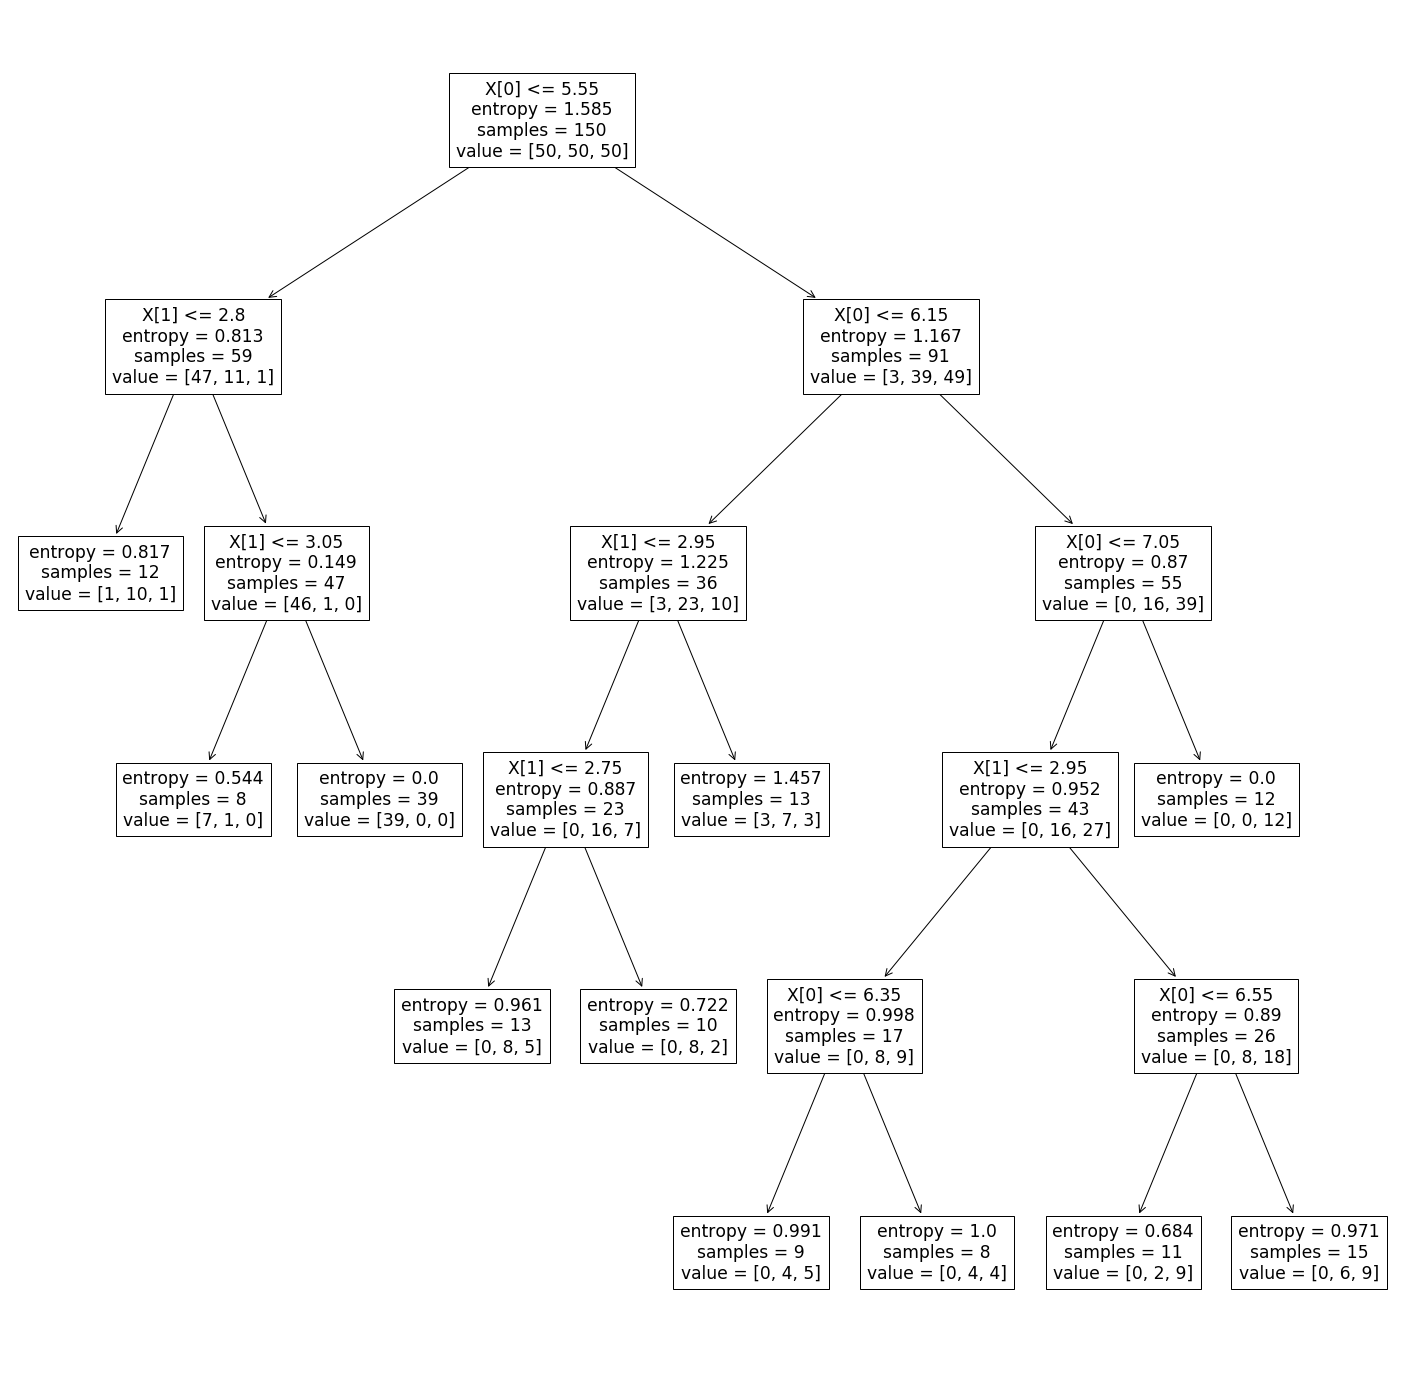

In [222]:
#可视化树模型
plt.figure(figsize=[25,25])
tree.plot_tree(dt_clf) 

In [137]:
#np.meshgrid(a,b)
#二维坐标系中,X轴可以取三个值1,2,3, Y轴可以取三个值7,8, 请问可以获得多少个点的坐标?
# 显而易见是6个:
# (1,7)(2,7)(3,7)
# (1,8)(2,8)(3,8)
#coding:utf-8
import numpy as np
# 坐标向量
a = np.array([1,2,3])
# 坐标向量
b = np.array([7,8])
# 从坐标向量中返回坐标矩阵
# 返回list,有两个元素,第一个元素行a轴的取值,有b行,第二个元素是列b轴的取值,有a列
np.meshgrid(a,b)


[array([[1, 2, 3],
        [1, 2, 3]]),
 array([[7, 7, 7],
        [8, 8, 8]])]

In [138]:
#np.stack
#axis=0是按行加，1是按列加
a = np.array([1, 2, 3])
b = np.array([2, 3, 4])
c = np.array([3, 4, 5])
np.stack((a, b), axis=0),np.stack((a, b), axis=1),np.stack((a, b,c), axis=0),np.stack((a, b,c), axis=1)


(array([[1, 2, 3],
        [2, 3, 4]]),
 array([[1, 2],
        [2, 3],
        [3, 4]]),
 array([[1, 2, 3],
        [2, 3, 4],
        [3, 4, 5]]),
 array([[1, 2, 3],
        [2, 3, 4],
        [3, 4, 5]]))

In [139]:
list(np.ones((8,5)).flat)#flat就是把矩阵拉平

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [140]:
# 画图
N, M = 500, 499 # 横纵各采样多少个值
x1_min, x1_max = x[:, 0].min(), x[:, 0].max() # 第0 列的范围
x2_min, x2_max = x[:, 1].min(), x[:, 1].max() # 第1 列的范围
t1 = np.linspace(x1_min, x1_max, N)
t2 = np.linspace(x2_min, x2_max, M)
x1, x2 = np.meshgrid(t1, t2) # 生成网格采样点

t1.shape,t2.shape,x1.shape,x2.shape

((500,), (499,), (499, 500), (499, 500))

In [141]:
x_test = np.stack((x1.flat, x2.flat), axis=1) # 测试点
x_test.shape

(249500, 2)

In [152]:
y_hat = dt_clf.predict(x_test)# 预测值
print(set(y_hat))
y_hat = y_hat.reshape(x1.shape) # 使之与输入的形状相同
y_hat 

{0.0, 1.0, 2.0}


array([[1., 1., 1., ..., 2., 2., 2.],
       [1., 1., 1., ..., 2., 2., 2.],
       [1., 1., 1., ..., 2., 2., 2.],
       ...,
       [0., 0., 0., ..., 2., 2., 2.],
       [0., 0., 0., ..., 2., 2., 2.],
       [0., 0., 0., ..., 2., 2., 2.]])

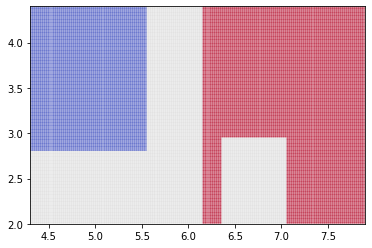

In [154]:
#绘制分类图 测值的显示Paired/Spectral/coolwarm/summer/spring/OrRd/Oranges
plt.pcolormesh(x1, x2, y_hat, cmap=plt.cm.coolwarm, alpha=0.1) 

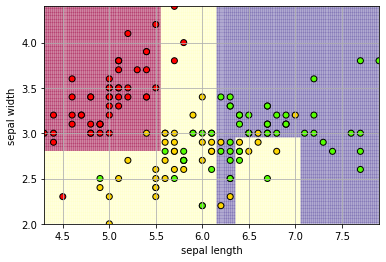

In [155]:
#绘制分类图
plt.pcolormesh(x1, x2, y_hat, cmap=plt.cm.Spectral, alpha=0.1) 
#y是一个二维的，必须化成一维的才能用于颜色展示
a=y.reshape(150)
#预测值的显示Paired/Spectral/coolwarm/summer/spring/OrRd/Oranges
plt.scatter(x[:, 0], x[:, 1], c=a, edgecolors='k', cmap=plt.cm.prism)
# 样本的显示
plt.xlabel(iris_feature[0])
plt.ylabel(iris_feature[1])
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.grid()
plt.show()


In [171]:
# 训练集上的预测结果
y_hat = dt_clf.predict(x)
y = y.reshape(-1) # 此转置仅仅为了print 时能够集中显示
print (y_hat.shape) # 不妨显示下y_hat 的形状
print (y.shape)
result = (y_hat == y) # True 则预测正确，False 则预测错误
print (y_hat)
print (y)
print (result)
#count_nonzero 统计True的个数  
c = np.count_nonzero(result) # 统计预测正确的个数
print (c)
print ('Accuracy: %.2f' % ( float(c) / float(len(result))))

(150,)
(150,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 2. 2. 2. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 2. 1. 1. 1.
 2. 1. 1. 2. 1. 2. 1. 1. 1. 1. 1. 1. 0. 1. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 2. 1. 1. 2. 1. 2. 2. 2. 2. 1. 2. 1. 2. 2. 1. 2. 1. 1. 2. 2. 2. 2. 1.
 2. 1. 2. 2. 2. 2. 2. 1. 1. 2. 2. 2. 1. 2. 1. 2. 2. 2. 1. 2. 2. 2. 1. 2.
 2. 2. 2. 2. 2. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2.]
[ True  True  True  True  True  True  True  True  True  True  True  Tr

# 四个特征

In [240]:
x, y = np.split(data, (4,), axis=1)
from sklearn.model_selection import train_test_split
x1,x2,y1,y2=train_test_split(x,y,train_size=0.8, random_state=1)
x1.shape,x2.shape,y1.shape,y2.shape

((120, 4), (30, 4), (120, 1), (30, 1))

In [241]:

# 决策树参数估计
clf = tree.DecisionTreeClassifier()
dt_clf = clf.fit(x1, y1)
dt_clf.score(x2,y2)

0.9666666666666667

[Text(558.0, 1245.75, 'X[2] <= 2.6\ngini = 0.665\nsamples = 120\nvalue = [39, 37, 44]'),
 Text(418.5, 1019.25, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(697.5, 1019.25, 'X[3] <= 1.65\ngini = 0.496\nsamples = 81\nvalue = [0, 37, 44]'),
 Text(279.0, 792.75, 'X[2] <= 4.95\ngini = 0.18\nsamples = 40\nvalue = [0, 36, 4]'),
 Text(139.5, 566.25, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]'),
 Text(418.5, 566.25, 'X[3] <= 1.55\ngini = 0.32\nsamples = 5\nvalue = [0, 1, 4]'),
 Text(279.0, 339.75, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(558.0, 339.75, 'X[2] <= 5.45\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(418.5, 113.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(697.5, 113.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(1116.0, 792.75, 'X[2] <= 4.85\ngini = 0.048\nsamples = 41\nvalue = [0, 1, 40]'),
 Text(976.5, 566.25, 'X[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(837.0, 339.75, 'gini = 0.0\nsamples = 3\nvalue = [0,

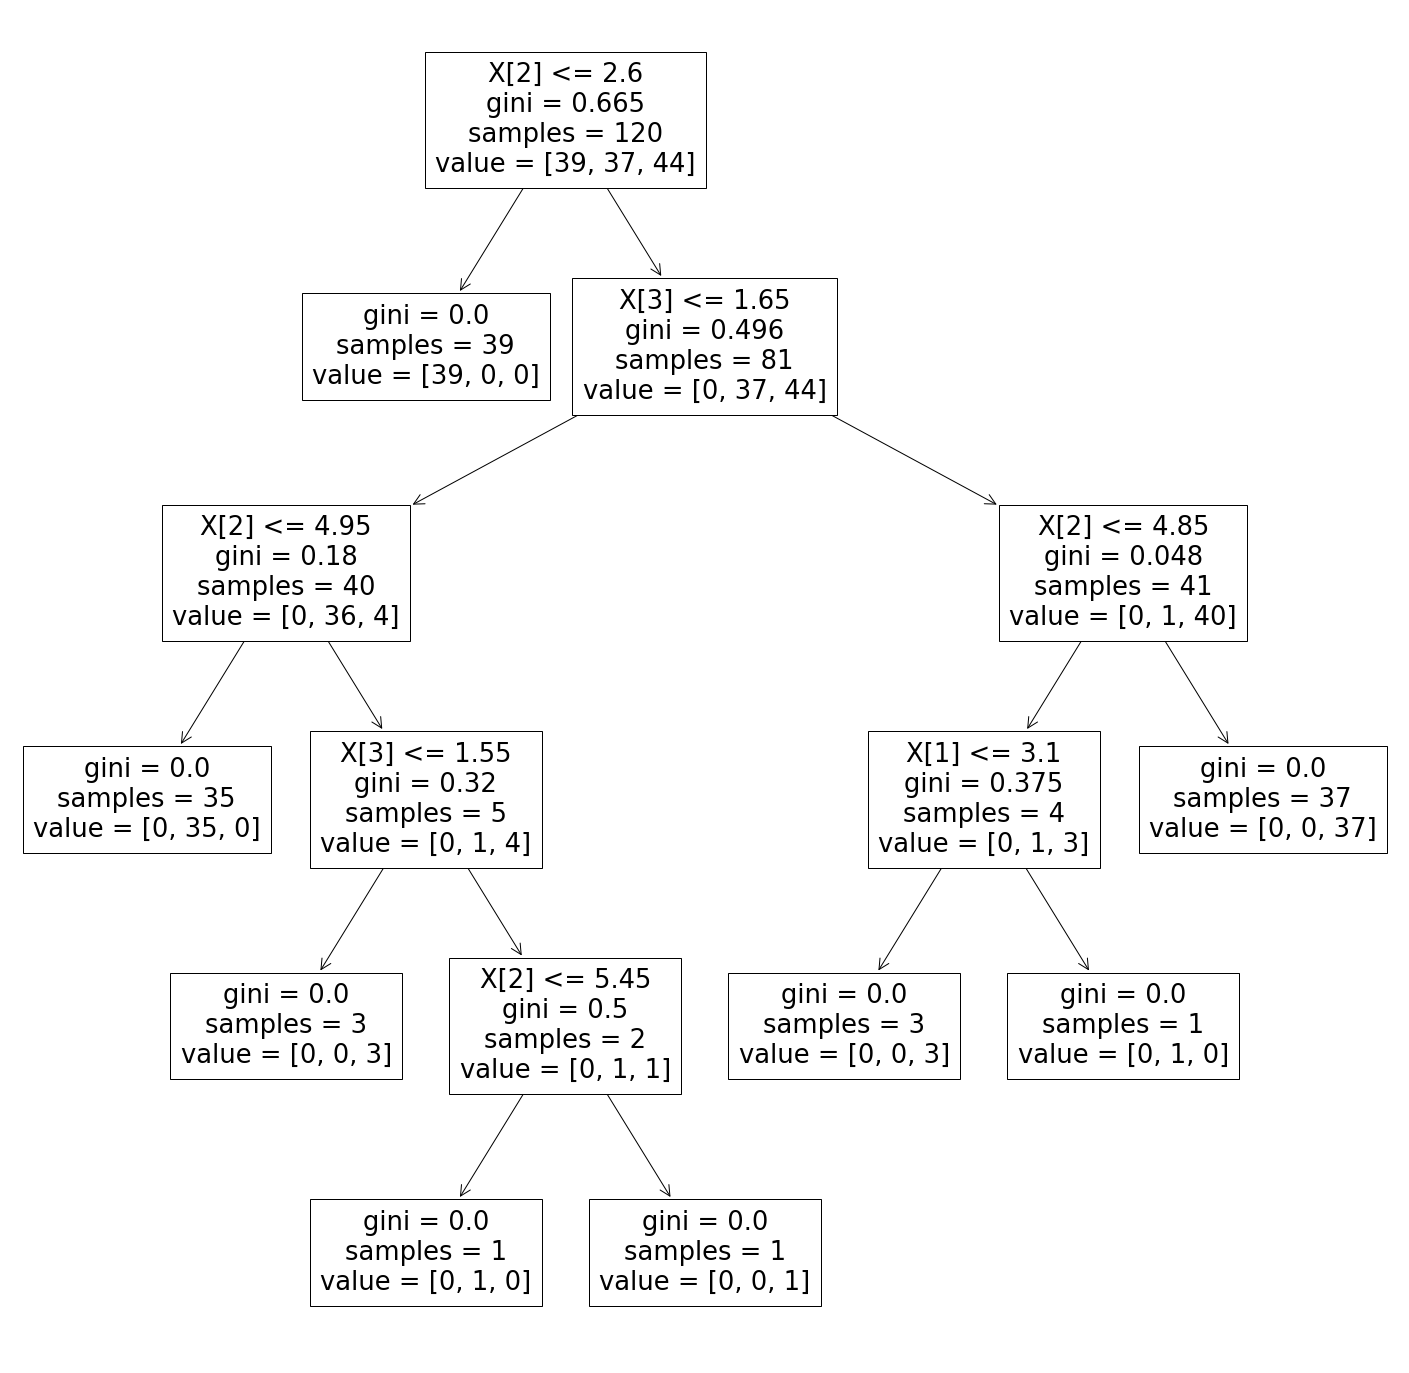

In [242]:
#可视化树模型
plt.figure(figsize=[25,25])
tree.plot_tree(dt_clf) 

# 数据可视化

In [232]:
import pandas as pd
iris_data = pd.read_csv('iris.data')
iris_data.columns = ['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm', 'class']
iris_data

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [233]:
#展示一些特征的属性值
iris_data.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


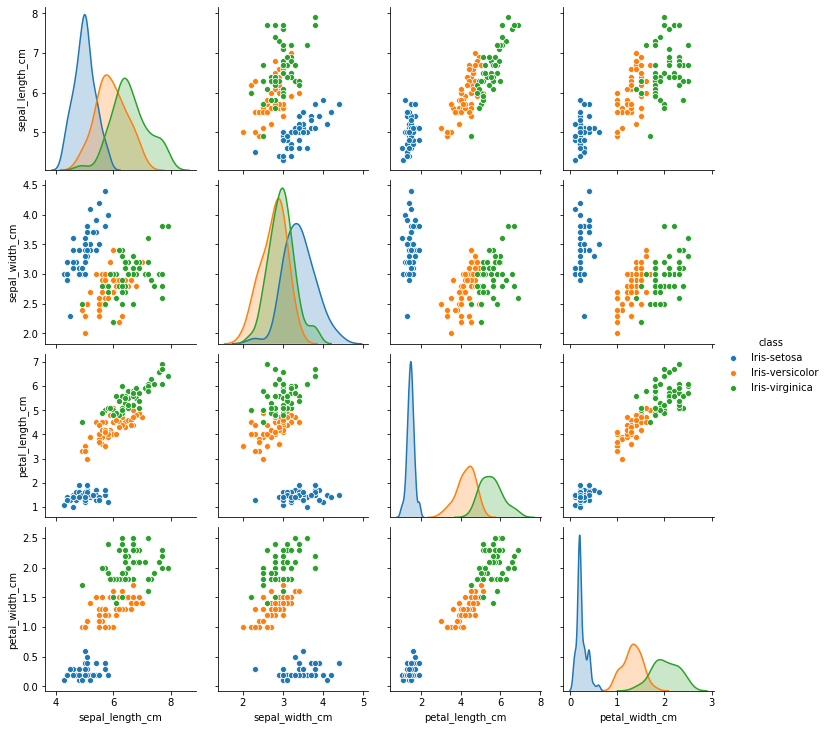

In [236]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

sb.pairplot(iris_data.dropna(), hue='class')

[1.         0.93333333 1.         0.93333333 0.93333333 0.86666667
 0.93333333 1.         1.         1.        ]


Text(0.5, 1.0, 'Average score: 0.96')

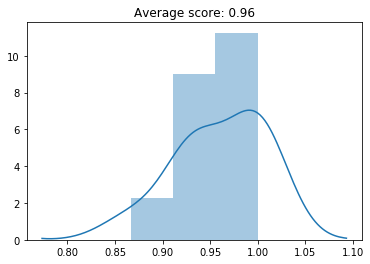

In [268]:
from sklearn.model_selection import cross_val_score
import numpy as np

# cross_val_score交叉验证，返回一个分数列表，我们可以将其可视化
# 来合理地估计分类器的性能
cv_scores = cross_val_score(dt_clf,x, y, cv=10)
print (cv_scores)

sb.distplot(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

In [274]:

from  sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

parameter_grid = {'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3, 4]}

'''StratifiedKFold分层采样，用于交叉验证：与KFold最大的差异在于，StratifiedKFold方法是根据标签中不同类别占比来进行拆分数据的。
#sklearn.model_selection.KFold(n_splits=3,shuffle=False,random_state=None)
#sklearn.model_selection.StratifiedKFold(n_splits=3,shuffle=False,random_state=None)
'''
cross_validation = StratifiedKFold(n_splits=3,shuffle=False,random_state=None)

'''
GridSearchCV它存在的意义就是自动调参，只要把参数输进去，就能给出最优化的结果和参数。
但是这个方法适合于小数据集，一旦数据的量级上去了，很难得出结果。
数据量比较大的时候可以使用一个快速调优的方法——坐标下降。
它其实是一种贪心算法：拿当前对模型影响最大的参数调优，直到最优化；再拿下一个影响最大的参数调优，如此下去，直到所有的参数调整完毕。
这个方法的缺点就是可能会调到局部最优而不是全局最优，但是省时间省力，巨大的优势面前，还是试一试吧，后续可以再拿bagging再优化。'''
grid_search = GridSearchCV(dt_clf ,
                           param_grid = parameter_grid,
                           cv=cross_validation)

grid_search.fit(x,y)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.9733333333333333
Best parameters: {'max_depth': 3, 'max_features': 4}
